In [1]:
# importing pandas and openpyxl to open .xlsx files
import pandas as pd
import openpyxl
import os

# check working directory
os.chdir('/users/simonw/ds_1300_notebooks/project')

## Pre-processing in Excel
The data from the PA WIC Program were formatted for reading in Excel with WIC participation in all PA counties presented as a separate sheet for every month over the past 4 years. This made the data poorly suited for analysis in Python. 

Thus, a simple pre-processing procedure harnessing the INDIRECT() function was employed in Excel to create a sheet with total WIC participation in Allegheny County every month for the past 4 years in long format. 

In [2]:
# read Pennsylvania WIC participation data
wic = pd.read_excel("data/WIC_participation.xlsx", sheet_name='AC_Trends')

In [3]:
# The column "Sheet_name" was used strictly for pre-processing, so we can remove it.
wic = wic.drop(columns=['Month_short', 'Sheet_name'])

In [4]:
# Now, we need to add a column merging our month and year for our line plots
import datetime

# arbitrary day column to fit the to_datetime() function 
wic['Day'] = wic.apply(lambda row: 0*(row['Year'])+1, axis=1)

# convert shortened month names to full names
month_map = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sept': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

# map the above dictionary to create a new column with full month names
wic['Month'] = wic['Month'].map(month_map)

# create a new column with the full date as a string
wic['Date'] = wic['Year'].astype(str) + ' ' + wic['Month'] + ' ' + wic['Day'].astype(str)

# conver the combined string column into datetime format
wic['Date'] = pd.to_datetime(wic['Date'], yearfirst=True)

In [5]:
wic

,Year,Month,Total_participation,Day,Date
0,2020,December,10867,1,2020-12-01
1,2021,January,10875,1,2021-01-01
2,2021,February,10775,1,2021-02-01
3,2021,March,10988,1,2021-03-01
4,2021,April,10877,1,2021-04-01
5,2021,May,10639,1,2021-05-01
6,2021,June,10314,1,2021-06-01
7,2021,July,9909,1,2021-07-01
8,2021,August,9795,1,2021-08-01
9,2021,September,9786,1,2021-09-01


## Graphing Trends In WIC Enrollment

In [6]:
# import matplotlib
import matplotlib as plt
%matplotlib inline

<Axes: xlabel='Date'>

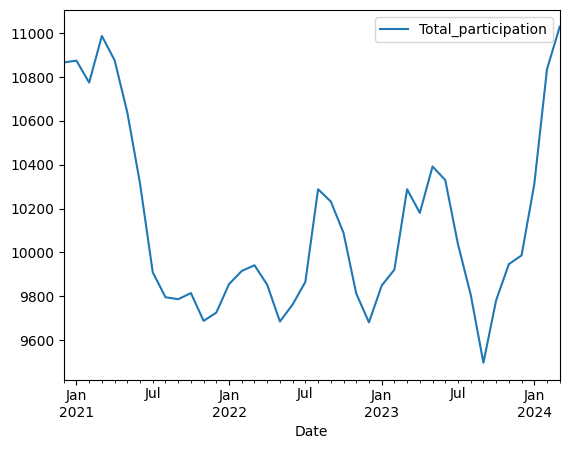

In [7]:
# Line Graph 1
# WIC Participation Trends
wic.plot(kind='line', x='Date', y='Total_participation')

# consider changing the y-axis range because this graph may show greater fluctuation than there really is 